In [2]:
import os
import shutil
import allensdk
import pprint
from pathlib import Path

import numpy as np
import pandas as pd
import scipy.stats as st

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import ttest_ind

sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

In [3]:
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

data_directory = '/overflow/NSCI274/projects/ecephysdata/'
manifest_path = os.path.join(data_directory, "manifest.json")
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

In [4]:
units = cache.get_units()
uDG = units[units['ecephys_structure_acronym'] == 'DG']
uDGM = uDG[uDG['sex'] == 'M']
uDGF = uDG[uDG['sex'] == 'F']

In [5]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

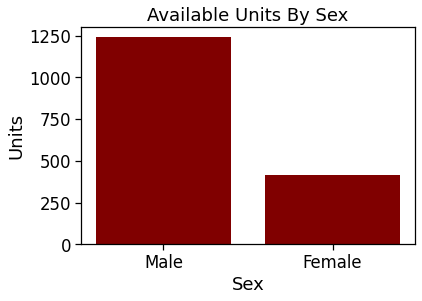

In [6]:
xAx = ['Male', 'Female']
yAx = [len(uDGM), len(uDGF)]
plt.bar(xAx, yAx, color = 'maroon')
plt.title('Available Units By Sex')
plt.xlabel('Sex')
plt.ylabel('Units')

plt.show
plt.savefig('availability.png')

7.4381227520779465 7.818394291937342


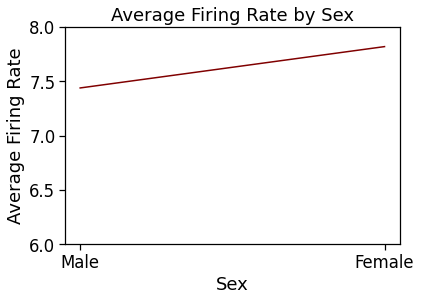

In [7]:
avgFR_M = uDGM['firing_rate'].mean()
avgFR_F = uDGF['firing_rate'].mean()

print(avgFR_M, avgFR_F)

xAxis = ['Male', 'Female']
yAxis = [avgFR_M, avgFR_F]
plt.plot(xAxis, yAxis, color='maroon')
plt.title('Average Firing Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Firing Rate')
plt.ylim([6, 8])
plt.savefig('fr_dif.png')